In [18]:
import datetime as dt

### Pessoa Fisica

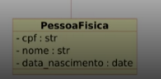

In [19]:
class PessoaFisica:
    def __init__(self, cpf, nome, data_nascimento):
        self._cpf = cpf
        self._nome = nome
        self._data_nascimento = data_nascimento

### Cliente

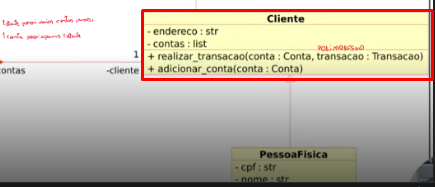

In [20]:
class Cliente(PessoaFisica):
    def __init__(self, cpf, nome, data_nascimento, endereco):
        super().__init__(cpf, nome, data_nascimento)
        self._endereco = endereco
        self._contas = []

    @property
    def contas(self):
        return self._contas

    # Classe para criar um cliente
    @classmethod
    def criar_cliente(cls, cpf, nome, data_nascimento, endereco):
        return cls(cpf, nome, data_nascimento, endereco) 

    # Metodo para adicionar contas a lista de conta do cliente
    def adicionar_conta(self, conta):
        self._contas.append(conta)


    # Excluir essa classe após terminar
    def __str__(self) -> str:
        return f'cpf: {self._cpf}\nnome: {self._nome}\ndata_nascimento: {self._data_nascimento}\nendereco: {self._endereco}\nContas: {self._contas}\n'
    

### Conta Corrente 

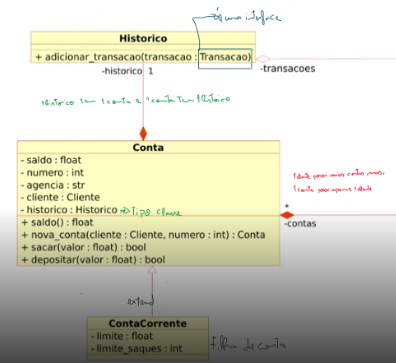

In [21]:
class ContaCorrente:
    _limite = 500
    _limite_saques = 3

    def __init__(self):
        pass
    
    @staticmethod
    def visualizar_limite(_limite):
        return _limite
    
    @staticmethod
    def visualizar_limite_saques(_limite_saques):
        return _limite_saques

#### Historico

In [22]:
class Historico:
    def __init__(self):
        self._transacoes = {}

    @property
    def transacoes(self):
        return self._transacoes
    

    # Adiciona uma transação a lista de transações do historico
    def adicionar_transacao(self, transacao):
        self._transacoes[dt.datetime.now()] = transacao


### Transação

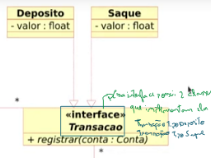

In [23]:
from abc import ABC, abstractmethod

class Transacao(ABC):
    @abstractmethod
    def registrar(self):
        pass


#### Deposito:

In [24]:
class Deposito:
    def __init__(self, valor):
        self._valor = valor


    def registrar(self, conta):
        status_transacao = conta.depositar(self._valor)

        if status_transacao:
            conta.historico.adicionar_transacao(self)
            
        

#### Saque:

In [25]:
class Saque:
    def __init__(self, valor):
        self._valor = valor


    def registrar(self, conta):
        status_transacao = conta.sacar(self._valor)
        
        if status_transacao:
            conta.historico.adicionar_transacao(self)

#### Conta

In [26]:
class Conta(ContaCorrente):
    def __init__(self, cliente, numero):
        super().__init__()
        self._cliente = cliente
        self._numero = numero
        self._historico = Historico()
        self._agencia = '0001'
        self._saldo = 0.0
          

    def saldo(self):
        return self._saldo
    

    @property
    def historico(self):
        return self._historico
    
    @property
    def numero(self):
        return self._numero
    

    # Classe para criar uma conta
    @classmethod
    def nova_conta(cls, cliente, numero):
        return cls(cliente, numero)
    

    # Retorna verdadeiro ou falso se for possível sacar/depositar
    def sacar(self, valor):
        if self._saldo >= valor:
            saques_hoje = {data: transacao for data, transacao in self._historico.transacoes.items() if (data.date() == dt.date.today()) and type(transacao) == Saque}

            if len(saques_hoje) < self._limite_saques:
                if valor <= self._limite:
                    self._saldo -= abs(valor)
                    return True  
        return False
    

    def depositar(self, valor):
        if valor > 0:
            self._saldo += valor
            return True    
        return False

    


    # Excluir essa classe após terminar
    def __str__(self) -> str:
        return f'saldo: {self._saldo}\nn ag: {self._agencia} - n conta: {self._numero}\nCliente: {self._cliente._nome}\nHistorico: {self._historico}'

    

### Menu

In [35]:
clientes = {}
contas = {}

def criar_cliente(clientes):
    '''Solicita os dados e depois instancia um objeto do tipo Cliente, que é adicionado ao dicionario de clientes
    composição: nome, data_nascimento, cpf, endereço{logradouro, bairro, cidade/sigla Estado}, cpf deve ser unico'''

    try:
        cpf = int(input('Digite o cpf (somente números) do usuario: '))

        
        if cpf not in clientes.keys():
            nome = input('Digite o nome: ')
            data_nascimento = input('Digite a data de Nascimento: ')
            logradouro = input('Digite a rua: ')
            bairro = input('Digite o bairro: ')
            cidade = input('Digite a cidade: ')
            estado = input('Digite a sigla do estado: ')
            endereco = f'{logradouro}, {bairro}, {cidade}/{estado}'

            clientes[cpf] = Cliente.criar_cliente(cpf, nome, data_nascimento, endereco)

            print('Usuario cadastrado com sucesso!\n')
        else:
            print('CPF já cadastrado')
    except:
        print('CPF inválido')


def visualizar_clientes(clientes):
    '''Função para visualizar os dados dos clientes, depois será excluido'''
    for cpf, cliente in clientes.items():
        print(cliente)


def criar_conta(clientes, contas):
    '''Criar Conta Corrente
    composição: agencia = 0001, numero da conta = sequencia=00001, usuario {cada usuario pode ter mais de uma conta} uma conta tem apenas 1 usuario'''


    try:
        cpf = int(input('Digite o CPF: '))
        
        if cpf in clientes.keys():

            ultima_conta_criada = max(contas.keys(), default=0)
            num_conta = ultima_conta_criada + 1
            contas[num_conta] = Conta.nova_conta(clientes[cpf], num_conta)

            # Além disso precisamos adicionar a conta ao cliente
            clientes[cpf].adicionar_conta(contas[num_conta])
   
            print('Conta cadastrada com sucesso!\n')
        else:
            print('CPF inválido / Usuario não cadastrado\n')
    except:
        print('CPF inválido / Usuario não cadastrado\n')


def depositar(clientes):
    
    try:
        cpf = int(input('Digite o CPF: '))
        
        if cpf in clientes.keys():
            try:
                print('Agencia 0001')
                conta_procurada = int(input('Digite o número da conta: '))
                contas_do_cpf = clientes[cpf].contas
                conta_do_usuario = next(conta for conta in contas_do_cpf if conta.numero == conta_procurada)

                try:
                    valor_deposito = float(input('Digite o valor do deposito: '))
                    deposito = Deposito(valor_deposito)
                    deposito.registrar(conta_do_usuario)
                    print('\nDeposito realizado com sucesso!\n')
                except:
                    print('\nValor inválido, transação não concluida\n')
            except:
                print('Número de conta inválido')
    except:
        print('CPF inválido/ Usuario não cadastrado')


def visualizar_extrato(clientes):
    '''Deve listar todos os depósitos e saques realizados na conta e 
    no final exibir o salto atual. Se não tiverem movimentação exibir
    "Não foram realizadas movimentações".
    Os valores devem ser exibidos "R$####.##"'''

    try:
        cpf = int(input('Digite o CPF: '))
        
        if cpf in clientes.keys():
            try:
                print('Agencia 0001')
                conta_procurada = int(input('Digite o número da conta: '))
                contas_do_cpf = clientes[cpf].contas
                conta_do_usuario = next(conta for conta in contas_do_cpf if conta.numero == conta_procurada)

                for data, transacao in conta_do_usuario.historico.transacoes.items():
                    print(f'{data.strftime("%d/%m/%Y")} - {transacao._valor} {type(transacao)}')

            except:
                print('Número de conta inválido')
    except:
        print('CPF inválido/ Usuario não cadastrado')






while True:
    opcao = input('''Digite a opção desejada:
    1 - Sacar
    2 - Depositar
    3 - Visualizar extrato
    4 - Novo cliente
    5 - Nova conta
    6 - Listar contas
    0 - Sair\n''')
    
    if opcao == '1':
        #sacar(usuarios)
        print('implementar')
    elif opcao == '2':
        depositar(clientes)
    elif opcao == '3':
        visualizar_extrato(clientes)
        print('implementar')
    elif opcao == '4':
        criar_cliente(clientes)
    elif opcao == '5':
        criar_conta(clientes, contas)
    elif opcao == '6':
        visualizar_clientes(clientes)
    elif opcao == '0':
        print('\nObrigada por utilizar nossos serviços\n')
        break
    else:
        print('\nOpção inválida, tente novamente\n')
    

Usuario cadastrado com sucesso!

Conta cadastrada com sucesso!

Agencia 0001

Deposito realizado com sucesso!

Agencia 0001
22/06/2024 - 5000.0 <class '__main__.Deposito'>
implementar
Agencia 0001

Deposito realizado com sucesso!

Agencia 0001
22/06/2024 - 5000.0 <class '__main__.Deposito'>
22/06/2024 - 432.25 <class '__main__.Deposito'>
implementar
Usuario cadastrado com sucesso!

Conta cadastrada com sucesso!

Agencia 0001

Deposito realizado com sucesso!

Agencia 0001
Número de conta inválido
implementar
Agencia 0001
22/06/2024 - 7000.0 <class '__main__.Deposito'>
implementar
Agencia 0001
22/06/2024 - 5000.0 <class '__main__.Deposito'>
22/06/2024 - 432.25 <class '__main__.Deposito'>
implementar

Obrigada por utilizar nossos serviços



Seção de teste, depois excluir

In [28]:
clientes = {}
contas = {}



cliente_01 = Cliente.criar_cliente(123, 'Ana', '12/12/1990', 'Rua do bobos 123')
cliente_02 = Cliente.criar_cliente(124, 'Pedro', '12/12/1980', 'Rua do bobos 567')



# Adicionando os clientes ao dicionario de clientes
clientes[123] = cliente_01
clientes[124] = cliente_02

# Criar uma conta para cada cliente
conta_01 = Conta.nova_conta(cliente_01, 1)
conta_02 = Conta.nova_conta(cliente_02, 2)
conta_03 = Conta.nova_conta(cliente_01, 3)

# Adicionando a conta no cadastro de cada cliente
cliente_01.adicionar_conta(conta_01)
cliente_02.adicionar_conta(conta_02)
cliente_01.adicionar_conta(conta_03)




# Acicionando as contas ao dicionario de contas
contas[1] = conta_01
contas[2] = conta_02
contas[3] = conta_03

# Vendo se os daos estão corretos
for cpf, cliente in clientes.items():
    print('/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*//*/*/*/*/*/*/*/*/')
    print(cpf, cliente)
    print(f'****** Contas do(a) {cliente._nome} ******')
    for conta in cliente._contas:
        print(conta)
        print(conta._historico)
    print('====================')



/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*//*/*/*/*/*/*/*/*/
123 cpf: 123
nome: Ana
data_nascimento: 12/12/1990
endereco: Rua do bobos 123
Contas: [<__main__.Conta object at 0x0000023AE29B6E10>, <__main__.Conta object at 0x0000023AE29B4150>]

****** Contas do(a) Ana ******
saldo: 0.0
n ag: 0001 - n conta: 1
Cliente: Ana
Historico: <__main__.Historico object at 0x0000023AE29B5B90>
saldo: 0.0
n ag: 0001 - n conta: 3
Cliente: Ana
Historico: <__main__.Historico object at 0x0000023AE29B51D0>
/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*//*/*/*/*/*/*/*/*/
124 cpf: 124
nome: Pedro
data_nascimento: 12/12/1980
endereco: Rua do bobos 567
Contas: [<__main__.Conta object at 0x0000023AE29B7E90>]

****** Contas do(a) Pedro ******
saldo: 0.0
n ag: 0001 - n conta: 2
Cliente: Pedro
Historico: <__main__.Historico object at 0x0000023AE29B5E90>


In [29]:
import time

deposito_de_5000 = Deposito(5000)
saque_de_500 = Saque(481.25)

# Adicionando um deposito e 3 saques a conta_01
deposito_de_5000.registrar(conta_01)
print(conta_01._saldo)
time.sleep(1)
saque_de_500.registrar(conta_01)
print(conta_01._saldo)
time.sleep(1)
saque_de_500.registrar(conta_01)
print(conta_01._saldo)
time.sleep(1)
saque_de_500.registrar(conta_01)
print(conta_01._saldo)
time.sleep(1)




5000.0
4518.75
4037.5
3556.25


In [30]:
print(conta_01.historico.transacoes)

for data, transacao in conta_01.historico.transacoes.items():
    print(f'{data.strftime("%d/%m/%Y")} - {transacao._valor} {type(transacao)}')

{datetime.datetime(2024, 6, 22, 19, 46, 27, 451359): <__main__.Deposito object at 0x0000023AE250CED0>, datetime.datetime(2024, 6, 22, 19, 46, 28, 452563): <__main__.Saque object at 0x0000023AE29B7790>, datetime.datetime(2024, 6, 22, 19, 46, 29, 453261): <__main__.Saque object at 0x0000023AE29B7790>, datetime.datetime(2024, 6, 22, 19, 46, 30, 454115): <__main__.Saque object at 0x0000023AE29B7790>}
22/06/2024 - 5000 <class '__main__.Deposito'>
22/06/2024 - 481.25 <class '__main__.Saque'>
22/06/2024 - 481.25 <class '__main__.Saque'>
22/06/2024 - 481.25 <class '__main__.Saque'>


In [31]:
print(cliente_01.contas)

lista_contas = cliente_01.contas
ct_procurada = 3


conta_encontrada = next(conta for conta in lista_contas if conta.numero == ct_procurada)


print(conta_encontrada)



[<__main__.Conta object at 0x0000023AE29B6E10>, <__main__.Conta object at 0x0000023AE29B4150>]
saldo: 0.0
n ag: 0001 - n conta: 3
Cliente: Ana
Historico: <__main__.Historico object at 0x0000023AE29B51D0>
